In [1]:
%run ../../../utils/commonImports.py
%run ../../../utils/tradingImports.py
%matplotlib inline

# Properties

In [2]:
dataRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataLabeled'
featuresRoot = 'D:\\Dropbox\\My work\\krypl-project\\dataFeatures'

fileName = 'return-01-loss-max-01-within-day.tsv'
fileNameDropedNA = 'return-01-loss-max-01-within-day-droped-na.tsv'
featuresFile = f'{featuresRoot}\\{fileName}'
featuresFileDropedNA = f'{featuresRoot}\\{fileNameDropedNA}'

In [42]:
file = f'{dataRoot}\\{fileName}'
data = pd.read_csv(file, sep='\t')
featured = data.copy()\
    .query("date > '2016-02-01'")\
    .sort_values('date')\
    .reset_index()\
    .drop('index', axis=1)

# Num of green in row

In [43]:
def num_in_row(y):
    in_row = [0]*len(y)
    for i in range(1, len(y)):
        in_row[i] = (y[i-1] + in_row[i-1]) * y[i-1]
    return in_row

In [44]:
greens = (featured['close'] > featured['open']).apply(int).tolist()
featured['greensInRow'] = num_in_row(greens)

# Num of red in row

In [45]:
reds = (featured['close'] < featured['open']).apply(int).tolist()
featured['redsInRow'] = num_in_row(reds)

# Scatter matrix

In [46]:
featured.columns

Index(['timestamp', 'period', 'open', 'high', 'low', 'close', 'volume',
       'quoteVolume', 'weightedAverage', 'date', 'maxReturn', 'tillMax',
       'minReturn', 'label', 'greensInRow', 'redsInRow'],
      dtype='object')

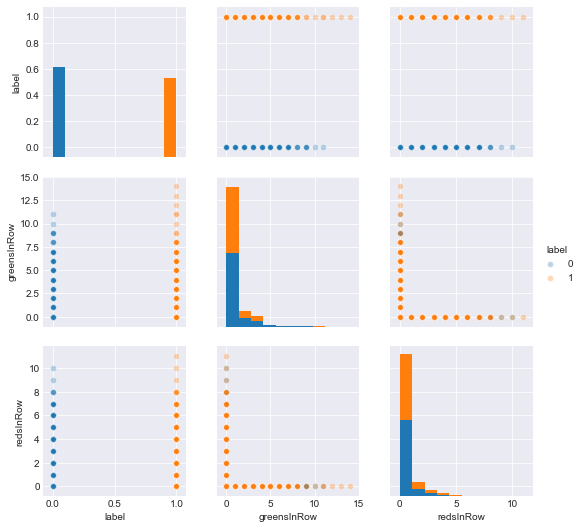

In [47]:
cols = ['label', 'greensInRow', 'redsInRow']
sampled = featured.query("date < '2017-09-15'").sample(10**4)
sns.pairplot(sampled[cols], hue='label', hue_order=[0, 1], vars=cols, plot_kws={'alpha': 0.3});

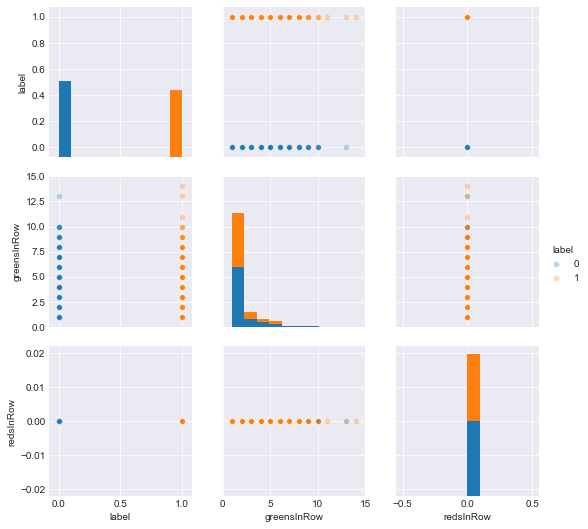

In [48]:
cols = ['label', 'greensInRow', 'redsInRow']
sampled = featured.query("date < '2017-09-15'").query("greensInRow > 0").sample(10**4)
sns.pairplot(sampled[cols], hue='label', hue_order=[0, 1], vars=cols, plot_kws={'alpha': 0.3});